henlo

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
street_trees <- street_trees <- read.csv("streettrees.csv", sep=";")
street_trees <- na.omit(street_trees)
data <- readLines("AreaProfiles.txt")
csv_content <- data[5:length(data)]
csv_string <- paste(csv_content, collapse = "\n")
AreaProfiles <- read.csv(text = csv_string, header = TRUE, stringsAsFactors = FALSE)
AreaProfiles <- na.omit(AreaProfiles)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
AreaProfiles_averageincome <- AreaProfiles %>%  slice(c(1882))%>%select(-ID)
AreaProfiles_averageincome[1, "Variable"] <- "Avg_income"

AreaProfiles_averageincome

Variable   Arbutus.Ridge Downtown Dunbar.Southlands Fairview
1 Avg_income 62675         63251    78117             61627   
  Grandview.Woodland Hastings.Sunrise Kensington.Cedar.Cottage Kerrisdale
1 42896              38258            38411                    77248     
  Killarney ⋯ Riley.Park Shaughnessy South.Cambie Strathcona Sunset
1 39013     ⋯ 53060      118668      65459        31534      34212 
  Victoria.Fraserview West.End West.Point.Grey Vancouver.CSD Vancouver.CMA
1 34298               47253    82042           50317         46821

table1.1

filter out the average income for each location in Vancouver

In [3]:
long_format <- AreaProfiles_averageincome %>%
  pivot_longer(cols = -Variable, names_to = "Location", values_to = "Value")

final_Areaincome<- long_format %>%
  pivot_wider(names_from = Variable, values_from = Value)
final_Areaincome

Location                 Avg_income
1  Arbutus.Ridge            62675     
2  Downtown                 63251     
3  Dunbar.Southlands        78117     
4  Fairview                 61627     
5  Grandview.Woodland       42896     
6  Hastings.Sunrise         38258     
7  Kensington.Cedar.Cottage 38411     
8  Kerrisdale               77248     
9  Killarney                39013     
10 Kitsilano                63092     
11 Marpole                  39020     
12 Mount.Pleasant           54260     
13 Oakridge                 46515     
14 Renfrew.Collingwood      33360     
15 Riley.Park               53060     
16 Shaughnessy              118668    
17 South.Cambie             65459     
18 Strathcona               31534     
19 Sunset                   34212     
20 Victoria.Fraserview      34298     
21 West.End                 47253     
22 West.Point.Grey          82042     
23 Vancouver.CSD            50317     
24 Vancouver.CMA            46821

table1.2

Rearrange the table so that we can directly and clearly see the average income for each location

In [4]:
areaavgincome <- AreaProfiles_averageincome %>% group_by(Variable) %>% summarize(mean = mean(Arbutus.Ridge:Vancouver.CMA))%>%
filter(Variable =="Avg_income")
areaavgincome


Variable   mean 
1 Avg_income 54748

table1.3

Calculate out the total average income among all locations.

In [5]:
lowincomearea <- final_Areaincome %>% filter(Avg_income < 54748.0)%>% select(Location,Avg_income)
Highincomearea <- final_Areaincome %>% filter(Avg_income >= 54748.0)%>% select(Location,Avg_income)

Filter out the low income area and high income area by comparing each income to the total average income

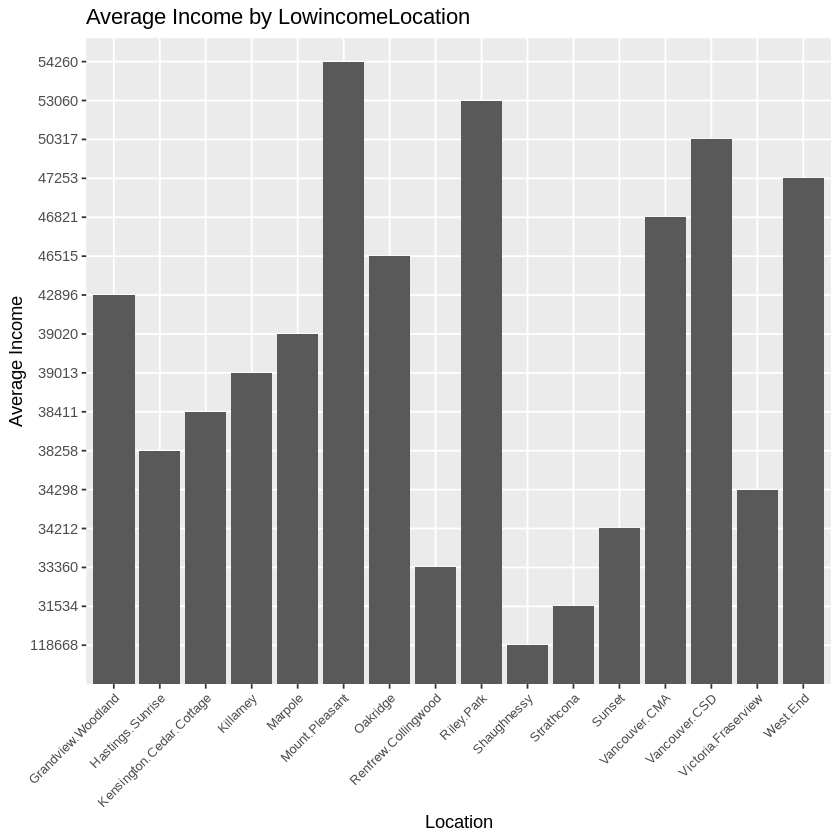

In [6]:
lowincomearea_plot<- lowincomearea %>% ggplot(aes(x=Location, y= Avg_income))+ geom_bar(stat="identity") +
labs(title="Average Income by LowincomeLocation",
       x="Location",
       y="Average Income") +theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
lowincomearea_plot

graph1.1

the visualization of income in each low income location

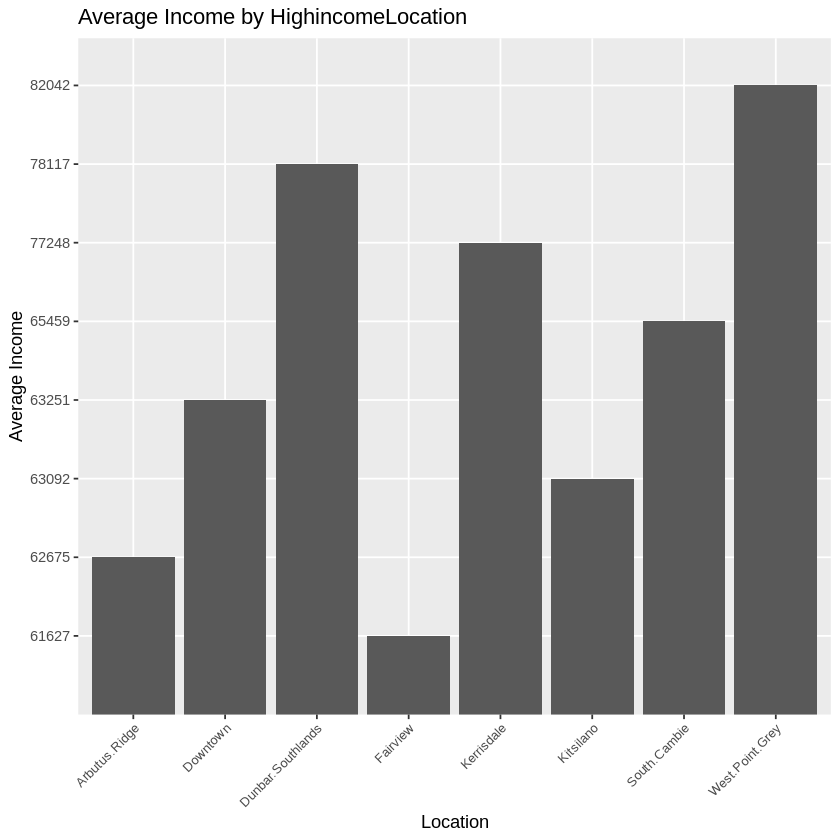

In [7]:
Highincomearea_plot<- Highincomearea %>% ggplot(aes(x=Location, y= Avg_income))+ geom_bar(stat="identity") +
labs(title="Average Income by HighincomeLocation",
       x="Location",
       y="Average Income") +theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
Highincomearea_plot

graph1.2

the visualization of income in each High income location

In [8]:
AreatreeDiameter <- street_trees %>% select("NEIGHBOURHOOD_NAME", "DIAMETER")
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "MOUNT PLEASANT"]<- "Mount.Pleasant"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "DUNBAR-SOUTHLANDS"]<- "Dunbar.Southlands"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "KENSINGTON-CEDAR COTTAGE"]<- "Kensington.Cedar.Cottage"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "GRANDVIEW-WOODLAND"]<- "Grandview.Woodland"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "MARPOLE"]<- "Marpole"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "KILLARNEY"]<- "Killarney"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "WEST END"]<- "West.End"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "VICTORIA-FRASERVIEW"]<- "Victoria.Fraserview"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "RILEY PARK"]<- "Riley.Park"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "KITSILANO"]<- "Kitsilano"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "OAKRIDGE"]<- "Oakridge"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "RENFREW-COLLINGWOOD"]<- "Renfrew.Collingwood"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "WEST POINT GREY"]<- "West.Point.Grey"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "FAIRVIEW"]<- "Fairview"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "DOWNTOWN"]<- "Downtown"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "ARBUTUS RIDGE"]<- "Arbutus.Ridge"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "SOUTH CAMBIE"]<- "South.Cambie"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "SHAUGHNESSY"]<- "Shaughnessy"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "STRATHCONA"]<- "Strathcona"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "HASTINGS-SUNRISE"]<- "Hastings.Sunrise"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "KERRISDALE"]<- "Kerrisdale"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "SUNSET"]<- "Sunset"


In [9]:
dinhigh <- AreatreeDiameter %>% filter(NEIGHBOURHOOD_NAME %in% Highincomearea$Location)
dinlow <- AreatreeDiameter %>% filter(NEIGHBOURHOOD_NAME %in% lowincomearea$Location)

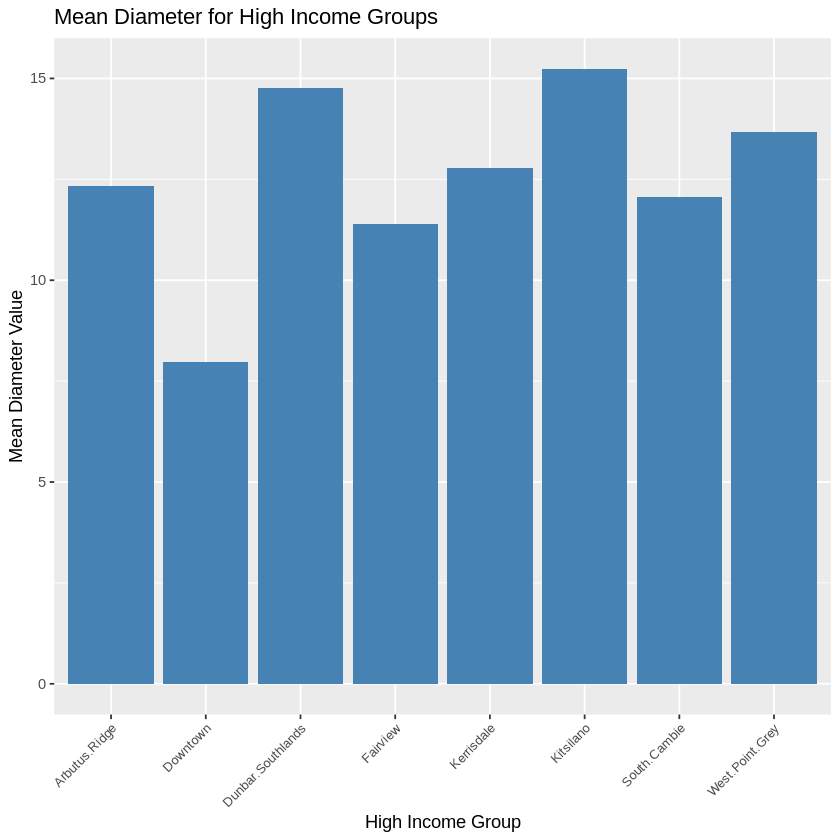

In [10]:
mean_for_eachhigh <- dinhigh %>% group_by(NEIGHBOURHOOD_NAME) %>% summarize(mean = mean(DIAMETER))
mean_for_eachhigh_plot <- mean_for_eachhigh %>% ggplot(aes(x=NEIGHBOURHOOD_NAME, y=mean))+ 
geom_bar(stat="identity", fill="steelblue")+
labs(title="Mean Diameter for High Income Groups", y="Mean Diameter Value", x="High Income Group")+
theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
mean_for_eachhigh_plot

graph1.3

Mean Tree Diameter among High Income Locations

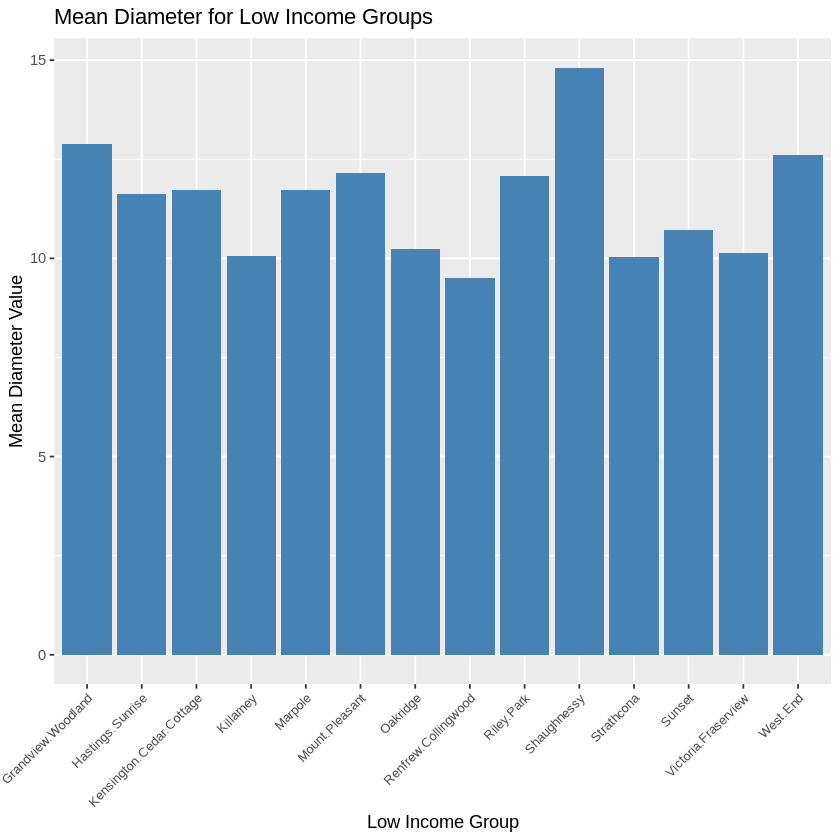

In [11]:
mean_for_eachlow <- dinlow %>% group_by(NEIGHBOURHOOD_NAME) %>% summarize(mean = mean(DIAMETER))
mean_for_eachlow_plot <- mean_for_eachlow %>% ggplot(aes(x=NEIGHBOURHOOD_NAME, y=mean))+ 
geom_bar(stat="identity", fill="steelblue")+
labs(title="Mean Diameter for Low Income Groups", y="Mean Diameter Value", x="Low Income Group")+
theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
mean_for_eachlow_plot

graph1.4

Mean Tree Diameter among Lower Income Locations

In [15]:

mean_d_inhigh <- mean(dinhigh$DIAMETER)
mean_d_inlow <- mean(dinlow$DIAMETER)
mean_f <- data.frame(Mean_For_Low = c(mean_d_inlow), Mean_For_High = c(mean_d_inhigh))
mean_f

Mean_For_Low Mean_For_High
1 11.40866     12.9423

In [ ]:
table1.4

In [ ]:
The mean of tree diamters in all low income area and high income area

In [16]:
bootstrapforhigh <- dinhigh %>% rep_sample_n(size=20, reps=1000, replace= TRUE)%>% group_by(replicate) %>% summarize(mean = mean(DIAMETER))
bootstrapfordlow <- dinlow %>% rep_sample_n(size=20, reps=1000, replace= TRUE)%>% group_by(replicate) %>% summarize(mean_for_low = mean(DIAMETER))
bootstrapdifmean <- bootstrapfordlow %>% mutate(mean_for_high = bootstrapforhigh$mean, dif_in_mean = bootstrapforhigh$mean - mean_for_low)


In [ ]:
bootstrapdifmean_plot <- bootstrapdifmean %>% ggplot() + 
    geom_histogram(aes(dif_in_mean, y = ..density..), color='red', binwidth=.05) + 
    theme(text = element_text(size=10)) +
    xlab("the difference in diameter") +
    ggtitle("the bootstrapped distribution for difference of tree diameter in high and low income area")
bootstrapdifmean_plot